# Task 1

Extract a subset of traning samples from the MNIST handwriten signatures. Create a small convolution neural network with two convolution layers, two pool layers, flatten, dense layer and softmax layer to classify the images. Find out classification error for learning set and testing set.



In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.utils import load_img
from keras.utils import img_to_array
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# from keras.models import Sequential, Model
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Conv2DTranspose, Input
from keras import layers
from keras import models

In [2]:
# write yout code
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
train_images = train_images[:10000]
train_labels = train_labels[:10000]
test_images = test_images[:1000]
test_labels = test_labels[:1000]

In [4]:
train_images = train_images.reshape([-1,28,28,1])
train_images = train_images.astype('float32')/255

test_images = test_images.reshape([-1,28,28,1])
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("After Splicing and Normalizing", train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

After Splicing and Normalizing (10000, 28, 28, 1) (10000, 10) (1000, 28, 28, 1) (1000, 10)


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32,kernel_size=3, activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32,kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation= 'softmax'))

model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs = 8,validation_split=0.1)


Epoch 1/8
282/282 [==============================] - 17s 58ms/step - loss: 0.5745 - accuracy: 0.8340 - val_loss: 0.2005 - val_accuracy: 0.9360
Epoch 2/8
282/282 [==============================] - 12s 42ms/step - loss: 0.1732 - accuracy: 0.9504 - val_loss: 0.1440 - val_accuracy: 0.9520
Epoch 3/8
282/282 [==============================] - 8s 28ms/step - loss: 0.1192 - accuracy: 0.9637 - val_loss: 0.1083 - val_accuracy: 0.9650
Epoch 4/8
282/282 [==============================] - 8s 29ms/step - loss: 0.0963 - accuracy: 0.9719 - val_loss: 0.1280 - val_accuracy: 0.9620
Epoch 5/8
282/282 [==============================] - 8s 28ms/step - loss: 0.0762 - accuracy: 0.9773 - val_loss: 0.1118 - val_accuracy: 0.9640
Epoch 6/8
282/282 [==============================] - 8s 28ms/step - loss: 0.0614 - accuracy: 0.9817 - val_loss: 0.0777 - val_accuracy: 0.9840
Epoch 7/8
282/282 [==============================] - 8s 28ms/step - loss: 0.0540 - accuracy: 0.9829 - val_loss: 0.0863 - val_accuracy: 0.9820
Epoc

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 10)                8

In [7]:
print("Training loss:", history.history['loss'][-1], 
      "Training accuracy:", history.history['accuracy'][-1])
result = model.evaluate(test_images, test_labels)
print("Testing loss:", result[0], "Testing accuracy:", result[1])

Training loss: 0.047474440187215805 Training accuracy: 0.984333336353302
32/32 [==============================] - 0s 10ms/step - loss: 0.0810 - accuracy: 0.9710
Testing loss: 0.0810258537530899 Testing accuracy: 0.9710000157356262


# Task 2

Create an autoencoder for MNIST fashion dataset. The input and the output is the same image of a number 28x28 pixels.



In [3]:
import tensorflow as tf
import numpy as np
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image

In [4]:

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [11]:
print("Dataset",train_images.shape, test_images.shape)


Dataset (60000, 28, 28) (10000, 28, 28)


In [12]:
train_images = train_images[:10000]
test_images = test_images[:1000]

train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.

train_images = train_images.reshape([-1, 28, 28, 1])
test_images = test_images.reshape([-1, 28, 28, 1])
print("After Splicing, Normalizing and Reshaping", train_images.shape, test_images.shape)

After Splicing, Normalizing and Reshaping (10000, 28, 28, 1) (1000, 28, 28, 1)


In [13]:
# Encoder
input = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(28,28,1))(input)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()
history = autoencoder.fit(x = train_images, y = train_images, epochs = 8, validation_data = (test_images, test_images))
predictions = autoencoder.predict(test_images)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

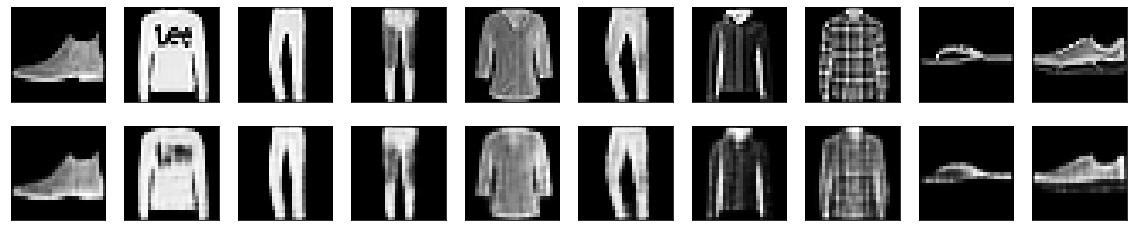

In [14]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i, :].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i, :].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Subtask 1

 Use two dense layers (hidden and output). Hidden layer with 2 neurons, output layer with 784 neurons. Plot the response of hidden neurons in scatter plot, number categories distinquish by colors.


In [46]:
import tensorflow as tf
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#reshape 2D (28x28) Image to 1D (784) 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
shapee=x_train.shape[1:]
print(shapee)
#Rescale  dataset

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.



#Encoder
input_img = Input(shape=(784,))


#code
coded = Dense(2, activation='relu')(input_img)
#Decoder
decoder_1 = Dense(784, activation='sigmoid')(coded)


autoencoder = Model(input_img, decoder_1)

#compile model
autoencoder.compile(loss = 'binary_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy']
                      )
autoencoder.summary()



(784,)
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_53 (Dense)            (None, 2)                 1570      
                                                                 
 dense_54 (Dense)            (None, 784)               2352      
                                                                 
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________


In [28]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=32,
                )
                

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4351 - accuracy: 0.0203
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4007 - accuracy: 0.0176
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3902 - accuracy: 0.0164
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3826 - accuracy: 0.0162
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3783 - accuracy: 0.0158


In [29]:
#Encoder
input_img = Input(shape=(784,))


#code
coded = Dense(2, activation='relu')(input_img)
encoder=Model(input_img, coded)

#set weights
encoder.layers[1].set_weights(autoencoder.layers[1].get_weights())

encoder.compile(loss = 'binary_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])


output=encoder.predict(x_train)
print(output.shape)

1875/1875 [==============================] - 3s 1ms/step
(60000, 2)


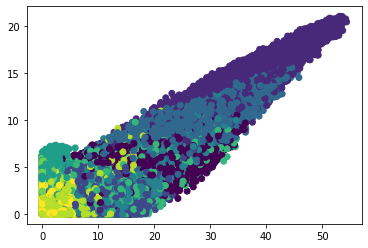

In [30]:
plt.scatter(output[:,0],output[:,1] , c=y_train)
plt.show()


## Subtask 2

Modify Subtask 1 so that you add three hidden layers and 2 latent features, i.e.
784-10-2-10-784 neurons. Observe differences.



In [48]:
import tensorflow as tf
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#Rescale  dataset
import numpy as np

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#reshape 2D (28x28) Image to 1D (784) 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#Encoder
input_img = Input(shape=(784,))
encoder = Dense(10, activation='relu')(input_img)

coded = Dense(2, activation='relu')(encoder)

#Decoder
decoder_2 = Dense(10, activation='relu')(coded)

decoder_2 = Dense(784, activation='sigmoid')(decoder_2)

autoencoder = Model(input_img, decoder_2)

#compile model
autoencoder.compile(loss = 'binary_crossentropy',
                    optimizer = 'adam')
autoencoder.summary()
autoencoder.fit(x_train, x_train,
                epochs=5,
                 batch_size=784,)
                

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_55 (Dense)            (None, 10)                7850      
                                                                 
 dense_56 (Dense)            (None, 2)                 22        
                                                                 
 dense_57 (Dense)            (None, 10)                30        
                                                                 
 dense_58 (Dense)            (None, 784)               8624      
                                                                 
Total params: 16,526
Trainable params: 16,526
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
77/77 [==============================] - 3s 

1875/1875 [==============================] - 3s 1ms/step
(60000, 10)


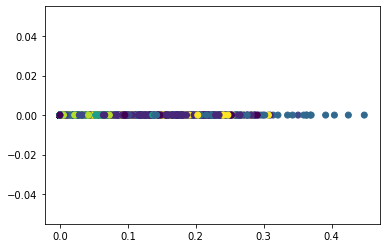

In [49]:
input_img = Input(shape=(784,))
encoder = Dense(10, activation='relu')(input_img)


#code
coded = Dense(2, activation='relu')(encoder)

#Decoder
decoder = Dense(10, activation='relu')(coded)

autoencoderr = Model(input_img, decoder)
#set weights
autoencoderr.layers[3].set_weights(autoencoder.layers[3].get_weights())

autoencoderr.compile(loss = 'binary_crossentropy',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

output=autoencoderr.predict(x_train)
print(output.shape)


plt.scatter(output[:,0],output[:,1] , c=y_train)
plt.show()

## Subtask 3

Modify Subtask 1 so that you add convolution layers, pooling layers, ... for the autoencoder and observe differences.


In [34]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images1, train_labels1), (test_images1, test_labels1) = fashion_mnist.load_data()
print(train_images1.shape, test_images1.shape)

train_images1 = train_images1.astype('float32') / 255.
test_images1 = test_images1.astype('float32') / 255.

train_images1 = train_images1.reshape([-1, 28, 28, 1])
test_images1 = test_images1.reshape([-1, 28, 28, 1])
print(train_images1.shape, test_images1.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [35]:
input_data = Input(shape=(28, 28, 1))
 
encoder = Conv2D(64, (5,5), activation='relu')(input_data)
encoder = MaxPooling2D((2,2))(encoder)
 
encoder = Conv2D(64, (3,3), activation='relu')(encoder)
encoder = MaxPooling2D((2,2))(encoder)
 
encoder = Conv2D(32, (3,3), activation='relu')(encoder)
encoder = MaxPooling2D((2,2))(encoder)
 
encoder = layers.Flatten()(encoder)
encoder = Dense(2)(encoder)
encoder_model_33 = Model(input_data, encoder)
encoder_model_33.summary()

#-------
decoder_input = Input(shape=(2))
decoder_cnn = Dense(64)(decoder_input)
decoder_cnn = layers.Reshape((1, 1, 64))(decoder_cnn)
decoder_cnn = Conv2DTranspose(64, (3,3), activation='relu')(decoder_cnn)
 
decoder_cnn = Conv2DTranspose(64, (3,3), activation='relu')(decoder_cnn)
decoder_cnn = UpSampling2D((2,2))(decoder_cnn)
 
decoder_cnn = Conv2DTranspose(64, (3,3), activation='relu')(decoder_cnn)
decoder_cnn = UpSampling2D((2,2))(decoder_cnn)
 
decoder_output = Conv2DTranspose(1, (5,5), activation='sigmoid')(decoder_cnn)
decoder_3 = Model(decoder_input, decoder_output)
decoder_3.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 32)          184

In [36]:
encoder_model_3 = encoder_model_33(input_data)
decoder_model_3 = decoder_3(encoder_model_3)

# Autoencoder
autoencoder_3 = Model(input_data, decoder_model_3)
autoencoder_3.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder_3.summary()
history = autoencoder_3.fit(x = train_images1, y = train_images1, epochs = 5, validation_split=0.1)
predictions_3 = autoencoder_3.predict(test_images1)

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 model_20 (Functional)       (None, 2)                 57122     
                                                                 
 model_21 (Functional)       (None, 28, 28, 1)         112577    
                                                                 
Total params: 169,699
Trainable params: 169,699
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1688/1688 [==============================] - 182s 107ms/step - loss: 0.3584 - val_loss: 0.3407
Epoch 2/5
1688/1688 [==============================] - 172s 102ms/step - loss: 0.3339 - val_loss: 0.3354
Epoch 3/5
1688/1688 [==============================] - 169s 100ms/step - loss: 0.3306 - val_loss: 0.3347
E

In [39]:
def response(d,l, hidden):
    ev=hidden.predict(d)
    print("Predicted shape: ",ev.shape)
    print("Original shape: ",d.shape)
    plt.scatter(ev[:,0],ev[:,1],c=l,cmap='viridis')
    plt.show()

1875/1875 [==============================] - 28s 15ms/step
Predicted shape:  (60000, 2)
Original shape:  (60000, 28, 28, 1)


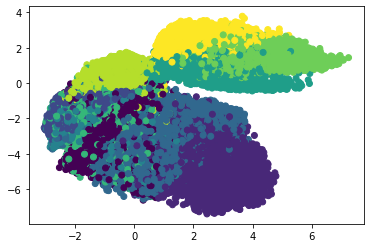

In [40]:
response(train_images1,train_labels1,encoder_model_33)


## Subtask 4

Extract the decoder from the autoencoder of subtask 1-3 and generate new images based on randomly generated latent features. Plot generated images.



In [41]:
# import random
# randomlist = []
# for i in range(0,4):
#     n = round(random.uniform(-5,5),1)
#     q = round(random.uniform(-5,5),1)
#     randomlist.append([n,q])

In [47]:
# plt.figure(figsize=(20, 4))
# for i in range(4):
#     # Display original
#     ax = plt.subplot(3, 4, i + 1)
#     digit_decoded = decoder_1.predict(randomlist)[i]
#     plt.imshow(digit_decoded.reshape(28,28), cmap='gray')
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
#     # Display reconstruction
#     ax = plt.subplot(3, 4, i + 1 + 4)
#     digit_decoded = decoder_2.predict(randomlist)[i]
#     plt.imshow(digit_decoded.reshape(28,28), cmap='gray')
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
#     # Display reconstruction
#     ax = plt.subplot(3, 4, i + 1 + 8)
#     digit_decoded = decoder_3.predict(randomlist)[i]
#     plt.imshow(digit_decoded.reshape(28,28), cmap='gray')
#     # plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.show()

#I tried to divide the subtask into separate section for this particular code, but unfortunately it did not worked that well.